In [1]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import pygraphviz as viz
import networkx as nx
import pandas as pd
import random
import numpy as np
from utils.draw import draw_graph, draw_partition, draw_partition2, draw_partition3

In [2]:
df = pd.read_csv('vk_links.csv')
df.head()

out_f           in_f
0   alisaborkova  anonskinonoch
1      tereshina  anonskinonoch
2         sinart  anonskinonoch
3  julietta.leks  anonskinonoch
4    irinalerman  anonskinonoch

In [3]:
G = nx.Graph()

In [4]:
for idx, row in df.iterrows():
    G.add_edge(row['out_f'], row['in_f'])

/home/pavel/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


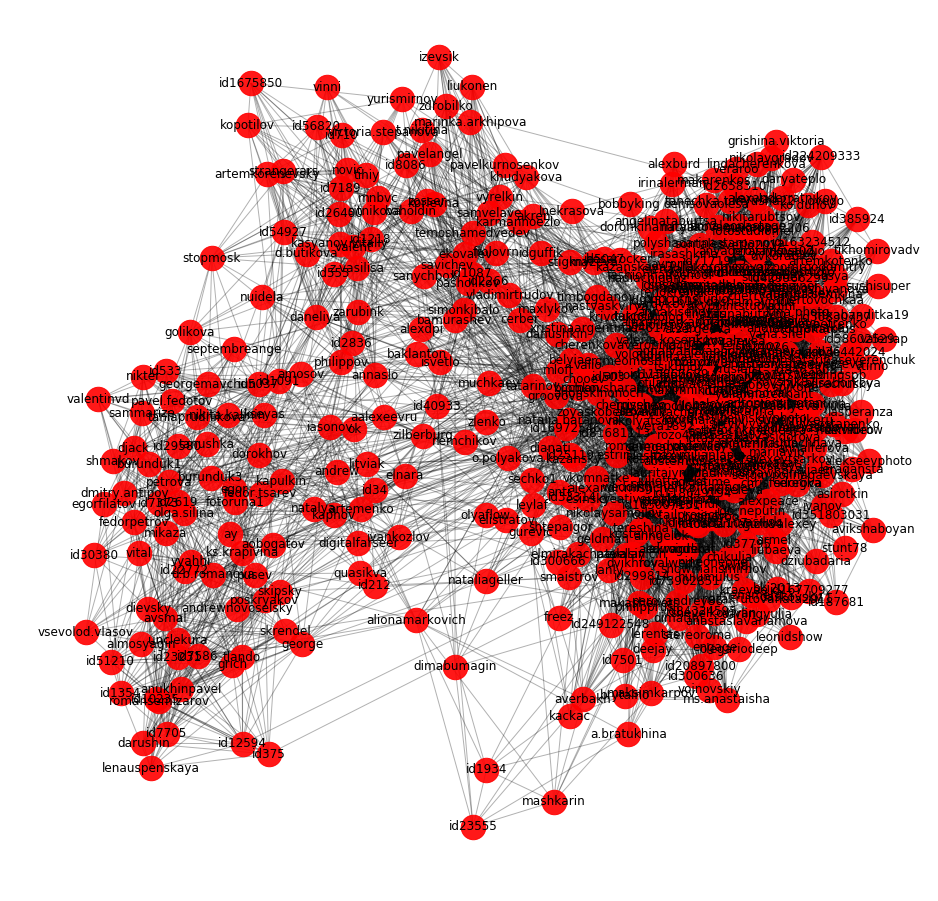

In [5]:
draw_graph(G)

## Best community partition

In [32]:
from community import community_louvain

In [23]:
partition = community_louvain.best_partition(G)

/home/pavel/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


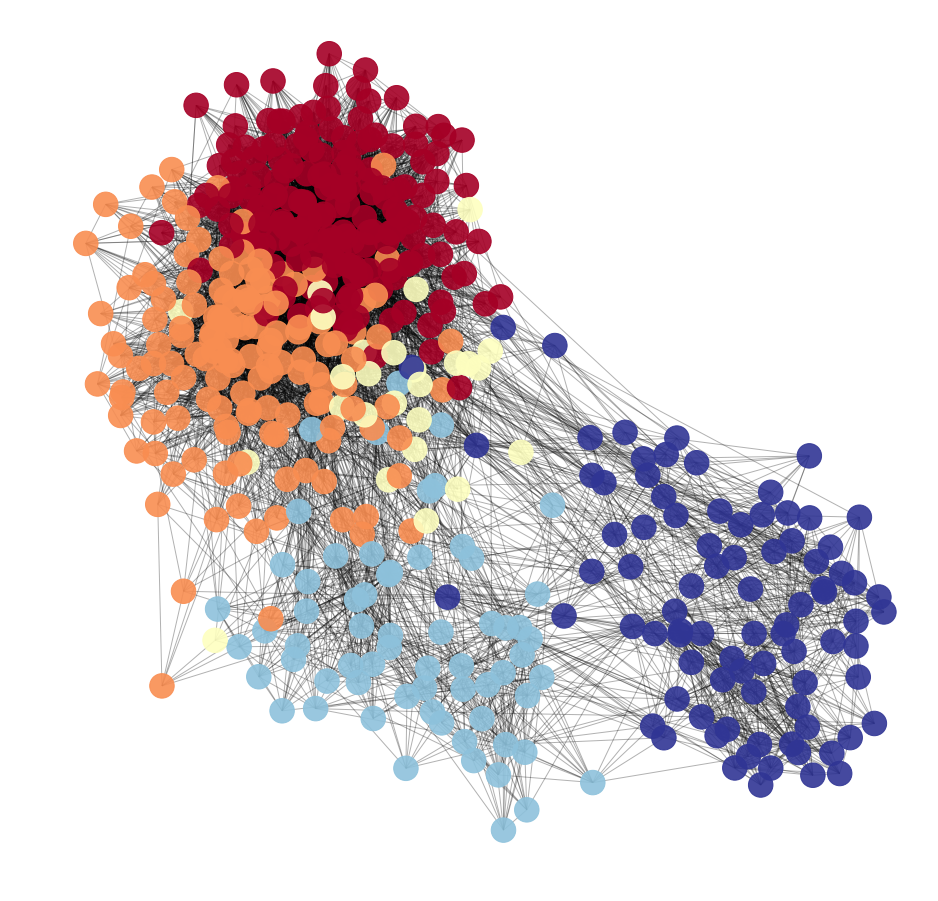

In [24]:
draw_partition2(G, partition)

## k-clique

In [25]:
from networkx.algorithms.community import k_clique_communities

In [26]:
def in_which(node, list_of_sets):
    idx = 0
    for s in list_of_sets:
        if node in s:
            return idx
        idx += 1

### k = 6

In [27]:
c = list(k_clique_communities(G, 5))
partition = [in_which(x, c) for x in list(G.nodes)]

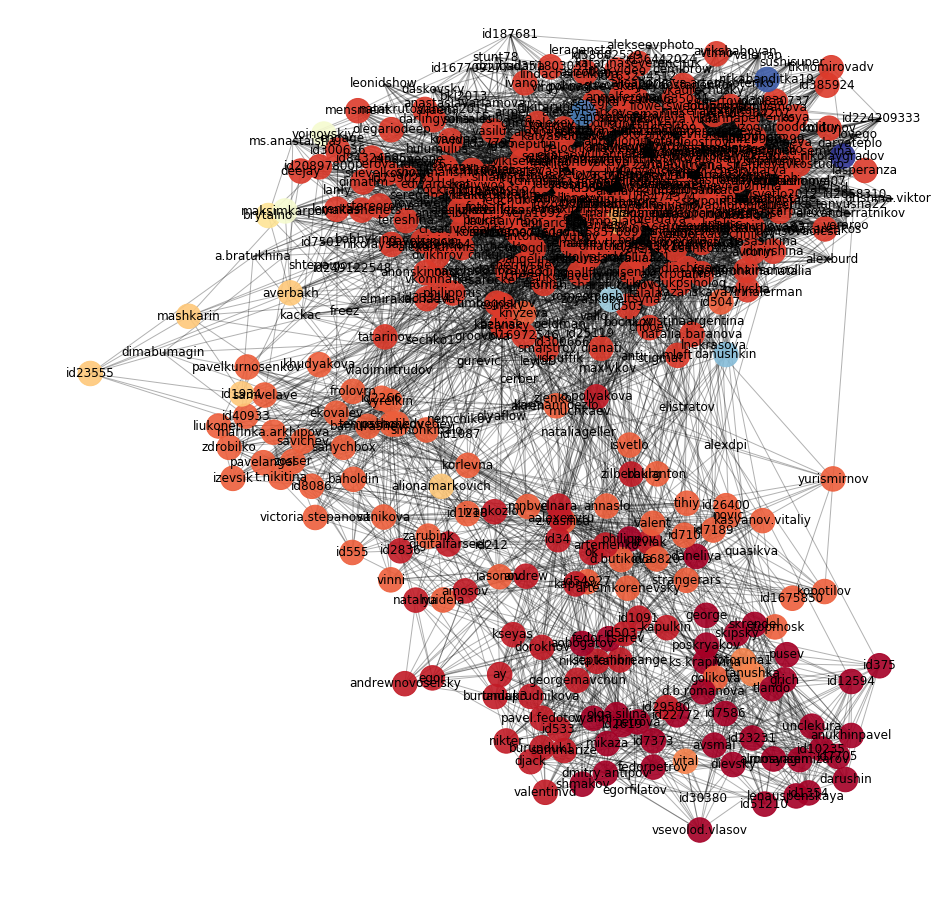

In [28]:
draw_partition3(G, partition)

## Finding leaders, agents and followers

### Методом обхода в ширину

Найдем роли пользователей в сообществе на примере одного из найденных сообществ

In [29]:
from collections import defaultdict, OrderedDict

In [33]:
partition = community_louvain.best_partition(G)
d = defaultdict(list)
for key, value in partition.items():
    d[value].append(key)

Возьмем первое найденное сообщество

In [34]:
first = G.subgraph(d[0]).copy()

/home/pavel/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


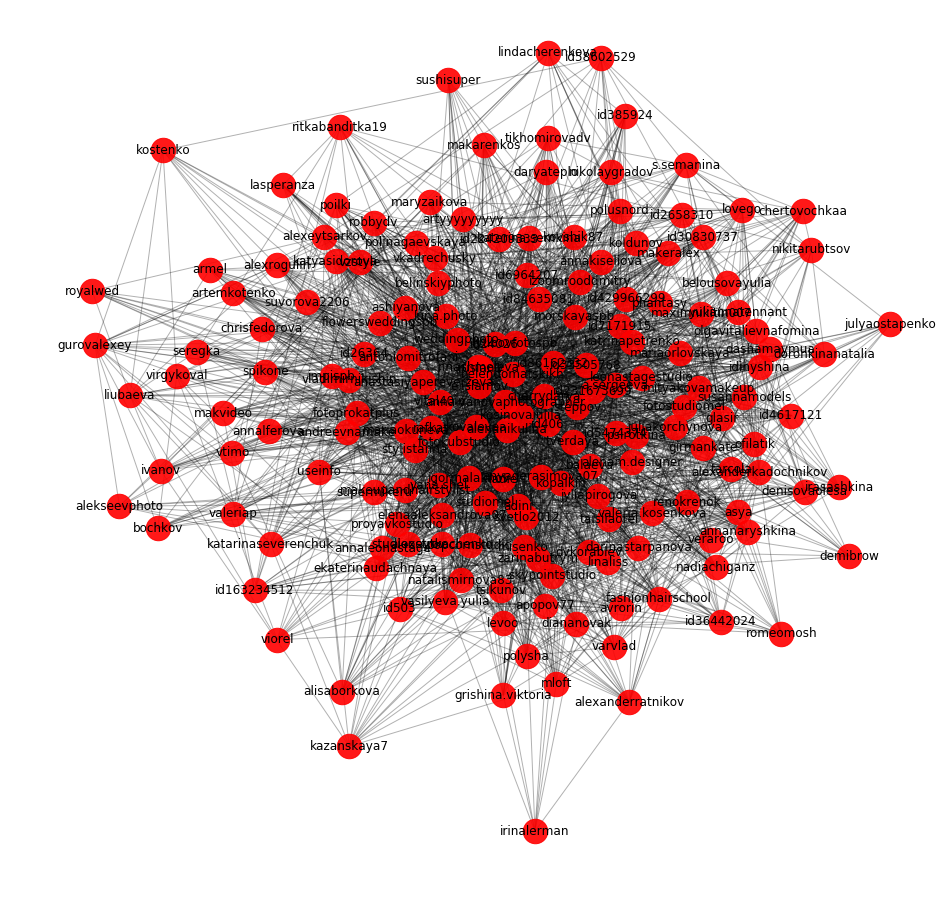

In [35]:
draw_graph(first)

#### Ранжировка пользователей

 1. Отсортируем пользователей по числу связей
 2. Возьмем 10% с наибольшим числом связей (N)
 3. Возьмем 10% с наименьшим числом связей (M)

Будем считать, что у лидера минимум связей, но при этом максимальный охват.
Выберем из N пользователей того, у кого больше всего связей с M пользователями - будем считать его лидером.

In [62]:
deg = list(first.degree)
deg.sort(key=lambda tup: tup[1])
top = deg[:int(len(deg)*0.1)]
bot = deg[-int(len(deg)*0.1):]

In [63]:
leaders = defaultdict(int)
for t in top:
    for n in bot:
        if n[0] in list(first.adj[t[0]]):
            leaders[t[0]] += 1

In [96]:
import operator
leader = max(leaders.items(), key=operator.itemgetter(1))[0]
leader

'lasperanza'

In [97]:
followers = set(first.adj[leader])
followers

{'annaivanovaphotographer',
 'cherrydarya',
 'id406',
 'id86162332',
 'kopalkin',
 'mariaokuneva',
 'rinashmeleva',
 'ritkabanditka19',
 'ruslan1',
 'tverdaya',
 'vital40in',
 'vladimirnikishin',
 'vzstyle',
 'weddingphoto'}

In [101]:
workers = set(first.nodes).difference(followers).difference(set([leader]))
workers

{'a.sergeeva',
 'adini',
 'alekseevphoto',
 'alenam.designer',
 'alenanikulina',
 'alexanderkadochnikov',
 'alexanderratnikov',
 'alexeytkachenko',
 'alexeytsarkov',
 'alexrogulin',
 'alisaborkova',
 'anastasiyapereverzeva',
 'andreevnamake',
 'annakiseliova',
 'annaleonastage',
 'annalferova',
 'annanaryshkina',
 'antoniomitrofani',
 'anyagerasimova07',
 'apopov77',
 'armel',
 'artemkotenko',
 'artyyyyyyyyy',
 'ashiyanova',
 'asya',
 'avrorin',
 'balaeva',
 'belinskiyphoto',
 'belousovayulia',
 'bochkov',
 'chertovochkaa',
 'chrisfedorova',
 'darinastarpanova',
 'daryateplo',
 'dashamaymua',
 'demibrow',
 'denisovaolesa',
 'diananovak',
 'doronkinanatalia',
 'dvkorablev',
 'e.islamov',
 'ekaterinaudachnaya',
 'elenaaleksandrova07',
 'fashionhairschool',
 'flowersweddingspb',
 'fotokubstudio',
 'fotoprokatplus',
 'fotostudiomel',
 'girmankate',
 'glasir',
 'grishina.viktoria',
 'gurovalexey',
 'helendomatskikh',
 'id163234512',
 'id224209333',
 'id231673699',
 'id24026',
 'id26364',
 '

In [103]:
d = dict(zip(list(first.nodes), range(len(list(first.nodes)))))

In [104]:
d

{'irasashkina': 0,
 'valeria.kosenkova': 1,
 'mariaokuneva': 2,
 'chrisfedorova': 3,
 'artyyyyyyyyy': 4,
 'royalwed': 5,
 'virgykoval': 6,
 'antoniomitrofani': 7,
 'annanaryshkina': 8,
 'mloft': 9,
 'e.islamov': 10,
 'adini': 11,
 'yana.shel': 12,
 'helendomatskikh': 13,
 'grishina.viktoria': 14,
 'idinyshina': 15,
 'leonastagestudio': 16,
 'popcornstudio': 17,
 'makeralex': 18,
 'id24026': 19,
 'ivanov': 20,
 'misenko': 21,
 'flowersweddingspb': 22,
 'psirotkina': 23,
 'kovalevea': 24,
 'ashiyanova': 25,
 'katyasidorova': 26,
 'alexeytsarkov': 27,
 'proyavkostudio': 28,
 'id224209333': 29,
 'tarcola': 30,
 'vasilyeva.yulia': 31,
 'asya': 32,
 'skypointstudio': 33,
 'glasir': 34,
 'natalismirnova83': 35,
 'jyliapirogova': 36,
 'doronkinanatalia': 37,
 'yuliannatennant': 38,
 'apopov77': 39,
 'seregka': 40,
 'id2658310': 41,
 'viorel': 42,
 'cherrydarya': 43,
 'id385924': 44,
 'maryzaikova': 45,
 'vtimo': 46,
 'a.sergeeva': 47,
 'nadiachiganz': 48,
 'id33505768': 49,
 'phantasy': 50,
 '

In [105]:
rank = defaultdict()
rank[d[leader]] = 0
for f in followers:
    rank[d[f]] = 1
for w in workers:
    rank[d[w]] = 2

Визуализируем граф в соответствии с рангами пользователей

/home/pavel/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


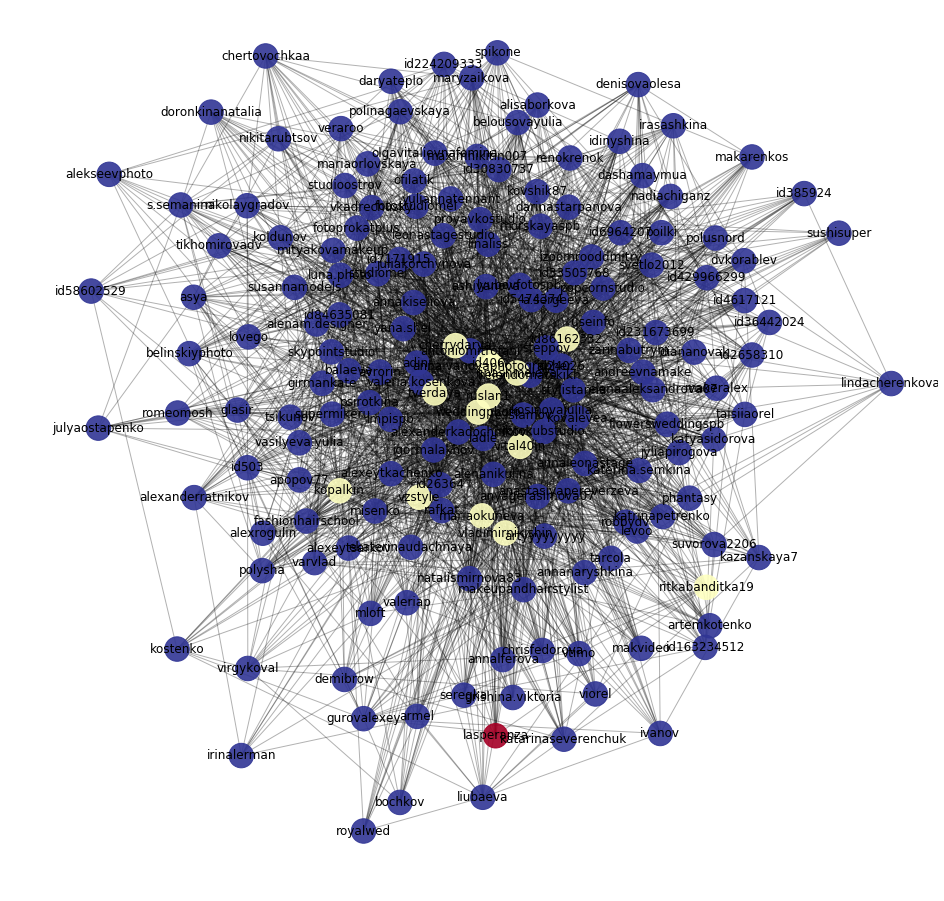

In [106]:
od = OrderedDict(sorted(rank.items()))
partition = list(od.values())
draw_partition3(first, partition)